# Import Libraries

In [9]:
import math
import random
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

import pickle
from functools import partial, update_wrapper

def wrapped_partial(func, *args, **kwargs):
    partial_func = partial(func, *args, **kwargs)
    update_wrapper(partial_func, func)
    return partial_func

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, make_scorer, accuracy_score, balanced_accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.neural_network import MLPClassifier

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Result storage

In [10]:
results_overview = {}
predictions_per_model = {}

# Data Loading

In [11]:
df_data = pd.read_csv('./Data/letter-recognition.csv', low_memory=False, sep=',')

In [12]:
df_data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## Class Distribution

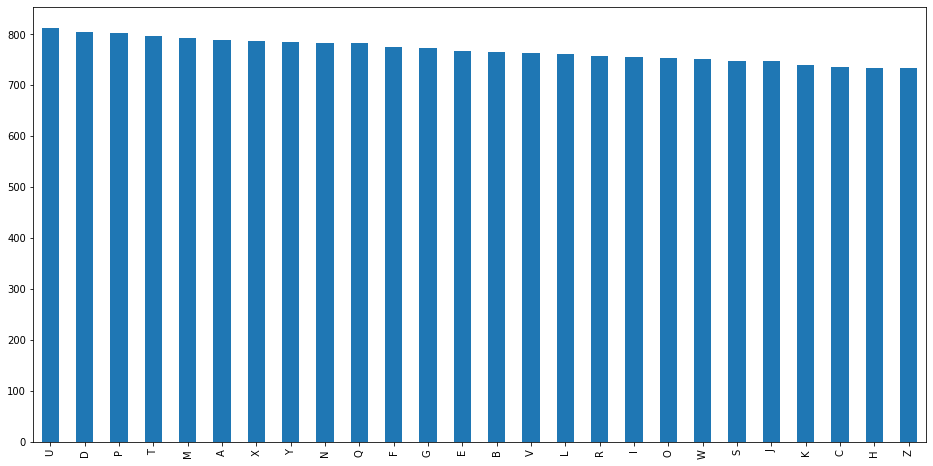

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

26

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
df_data['letter'].value_counts().plot(kind='bar')
plt.show()

display(df_data['letter'].value_counts())
display(len(df_data['letter'].value_counts()))

## Data Preprocessing

In [23]:
df = df_data.copy()

#Factorize the classes
class_factor = df['letter'].factorize()
class_index = class_factor[1]
df['letterF'] = class_factor[0]

#Feature columns
columns = sorted(set(df.columns) - set(['letter', 'letterF']))

X_all = df[columns]
Y_all = df['letterF']
X, X_test, Y, Y_test = train_test_split(X_all, Y_all, test_size=0.33, random_state=42)

## TDIF Transformation

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X)
X_test_tfidf = tfidf.transform(X_test)


tf = TfidfTransformer(use_idf=False)
X_tf = tf.fit_transform(X)
X_test_tf = tf.fit_transform(X_test)

In [25]:
pd.DataFrame(X_test_tfidf.A).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.243504,0.166112,0.200931,0.122016,0.241099,0.240452,0.120226,0.135296,0.278546,0.358130,0.320579,0.322956,0.279212,0.247906,0.315928,0.238754
1,0.272380,0.278716,0.202282,0.102364,0.202267,0.235345,0.134483,0.227010,0.367216,0.333832,0.201709,0.169338,0.267704,0.381293,0.265044,0.166916
2,0.143637,0.097985,0.237048,0.095965,0.094812,0.472789,0.141837,0.106410,0.281670,0.422504,0.425478,0.047626,0.094114,0.194978,0.106490,0.375559
3,0.128575,0.087711,0.084877,0.214757,0.254611,0.296249,0.084643,0.095252,0.336179,0.336179,0.296227,0.298424,0.294860,0.174533,0.238310,0.420224
4,0.269127,0.118023,0.190349,0.308240,0.266469,0.303719,0.151860,0.128171,0.301574,0.339270,0.227772,0.229461,0.264508,0.195709,0.213779,0.339270


# Linear Model

In [26]:
#do not run again
'''
clf = LogisticRegression()

parameter_grid = {
    'penalty': ['l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200,250]
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'balanced_accuracy', 'f1_weighted'], refit='accuracy')
cv_grid.fit(X_tfidf, Y)

print("Best Parameter Choice:")
print(cv_grid.best_params_)
'''

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.5min finished


Best Parameter Choice:
{'max_iter': 50, 'penalty': 'none', 'solver': 'newton-cg'}


# Linear Model: Results overview

In [27]:
#do not run again
'''
selected_columns = [
    'param_penalty',
    'param_solver',
    'param_max_iter',
    'mean_test_accuracy',
    'mean_test_balanced_accuracy',
    'mean_test_f1_weighted',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_estimator_penalty': "penalty",
    'param_estimator_solver': "solver",
    'param_estimator_max_iter': "max_iter",
    "mean_test_accuracy": "accuracy",
    "mean_test_balanced_accuracy": "balanced_accuracy",
    "mean_test_f1_weighted": "f1_weighted",
    "mean_fit_time": "fit_time"
})


for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result
'''

,param_penalty,param_solver,param_max_iter,accuracy,balanced_accuracy,f1_weighted,fit_time
35,none,newton-cg,250,0.768,0.767,0.767,14.073
5,none,newton-cg,50,0.768,0.767,0.767,13.211
25,none,newton-cg,200,0.768,0.767,0.767,13.356
15,none,newton-cg,100,0.768,0.767,0.767,14.067
36,none,lbfgs,250,0.767,0.766,0.766,7.828
26,none,lbfgs,200,0.766,0.766,0.766,6.090
38,none,sag,250,0.765,0.764,0.764,9.411
28,none,sag,200,0.764,0.763,0.763,7.175
39,none,saga,250,0.764,0.763,0.763,10.226
29,none,saga,200,0.763,0.763,0.763,9.653


# Linear Model: Prediction

In [33]:
clf = make_pipeline( LogisticRegression(max_iter= 50, penalty = 'none', solver = 'newton-cg' ))
clf.fit(X_tfidf, Y)

# CV
cv_result = cross_validate(clf, X_tfidf, Y, cv=3, scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted'], n_jobs=-1)

results_overview['Linear Model'] = {
    'accuracy': cv_result['test_accuracy'].mean(),
    'balanced_accuracy': cv_result['test_balanced_accuracy'].mean(),
    'f1_weighted': cv_result['test_f1_weighted'].mean(),
    'fit_time' : cv_result['fit_time'].mean()
    }

display(results_overview)

# Predict
y_prediction = clf.predict(X_test_tfidf)

{'Linear Model': {'accuracy': 0.7676862916667461,
  'balanced_accuracy': 0.7671121120486921,
  'f1_weighted': 0.7670768610342562,
  'fit_time': 10.158325036366781}}

In [34]:
y_prediction

array([25, 17,  7, ...,  0, 11, 22], dtype=int64)

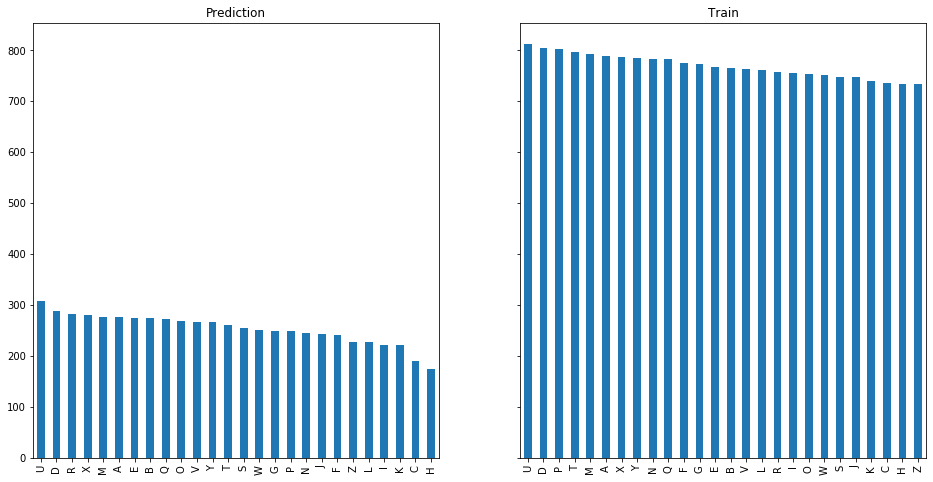

In [35]:
df_solution_test = pd.DataFrame(X_test)
df_solution_test['letter'] = [class_index[p] for p in y_prediction]

# Class distribution
fig, axs = plt.subplots(1, 2, sharey = True)
fig.set_size_inches(16, 8)

df_solution_test['letter'].value_counts().plot(kind='bar', ax = axs[0])
axs[0].set_title("Prediction")

df_data_train['letter'].value_counts().plot(kind='bar', ax = axs[1])
axs[1].set_title("Train")

plt.show()

# Random Forest

In [36]:
#do not run
'''
clf = OneVsRestClassifier(RandomForestClassifier())

parameter_grid = {
    'estimator__n_estimators': [10, 50, 100, 250],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 20, 30, 50]
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=5, verbose=10, n_jobs=-1, scoring=['accuracy', 'balanced_accuracy', 'f1_weighted'], refit='accuracy')
cv_grid.fit(X_tfidf, Y)

print(cv_grid.best_params_)
'''

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 59.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 65.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 79.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 94.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 113.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 134.3min finished


{'estimator__criterion': 'entropy', 'estimator__max_depth': 30, 'estimator__n_estimators': 250}


# Random Forest: result overview

In [37]:
#do not run
'''
selected_columns = [
    'param_estimator__n_estimators',
    'param_estimator__max_depth',
    'param_estimator__criterion',
    'mean_test_accuracy',
    'mean_test_balanced_accuracy',
    'mean_test_f1_weighted',
    'mean_fit_time'
]
df_result = pd.DataFrame(cv_grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False).head(10)[selected_columns]
df_result = df_result.rename(columns={
    'param_estimator__n_estimators': "n_estimators",
    'param_estimator__max_depth': "max_depth",
    'param_estimator__criterion': "criterion",
    "mean_test_accuracy": "accuracy",
    "mean_test_balanced_accuracy": "balanced_accuracy",
    "mean_test_f1_weighted": "f1_weighted",
    "mean_fit_time": "fit_time"
})

for col in df_result.columns:
    if df_result[col].dtype == np.float64:
        df_result[col] = df_result[col].apply(lambda x: '{0:.3f}'.format(round(x,3)))
df_result
'''

,n_estimators,max_depth,criterion,accuracy,balanced_accuracy,f1_weighted,fit_time
27,250,30,entropy,0.927,0.927,0.928,621.809
31,250,50,entropy,0.927,0.927,0.928,426.216
23,250,20,entropy,0.927,0.927,0.928,497.686
26,100,30,entropy,0.927,0.927,0.927,188.427
19,250,None,entropy,0.927,0.927,0.927,527.998
18,100,None,entropy,0.926,0.926,0.927,187.862
22,100,20,entropy,0.926,0.926,0.927,221.978
30,100,50,entropy,0.925,0.925,0.925,186.779
21,50,20,entropy,0.923,0.923,0.924,108.178
7,250,20,gini,0.923,0.923,0.923,428.344


# Random Forest: Prediction

In [39]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=250, max_depth=30, criterion='entropy'))
clf.fit(X_tfidf, Y)

# CV
cv_result = cross_validate(clf, X_tfidf, Y, cv=3, scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted'], n_jobs=-1)

results_overview['Random Forest'] = {
    'accuracy': cv_result['test_accuracy'].mean(),
    'balanced_accuracy': cv_result['test_balanced_accuracy'].mean(),
    'f1_weighted': cv_result['test_f1_weighted'].mean(),
    'fit_time' : cv_result['fit_time'].mean()
    }

display(results_overview)

# Predict
y_prediction = clf.predict(X_test_tfidf)

{'Linear Model': {'accuracy': 0.7676862916667461,
  'balanced_accuracy': 0.7671121120486921,
  'f1_weighted': 0.7670768610342562,
  'fit_time': 10.158325036366781},
 'Random Forest': {'accuracy': 0.920074325217791,
  'balanced_accuracy': 0.9200149783032798,
  'f1_weighted': 0.9204709085383836,
  'fit_time': 311.97340202331543}}